In [1]:
import numpy as np 
import pandas as pd 
import sys 
#Customs functions 
package_path = '..'
sys.path.insert(0, package_path)
from functions.descriptive import *
from functions.varplots import *

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\public_timeseries_testing_util.py
../data\supplemental_clinical_data.csv
../data\train_clinical_data.csv
../data\train_peptides.csv
../data\train_proteins.csv
../data\amp_pd_peptide\competition.cpython-37m-x86_64-linux-gnu.so
../data\amp_pd_peptide\__init__.py
../data\example_test_files\sample_submission.csv
../data\example_test_files\test.csv
../data\example_test_files\test_peptides.csv
../data\example_test_files\test_proteins.csv


# Data exploration and statistically analysis

In [2]:
import pandas as pd
sample_submission = pd.read_csv('../data/example_test_files/sample_submission.csv')
train_proteins = pd.read_csv('../data/train_proteins.csv')
test_proteins = pd.read_csv('../data/example_test_files/test_proteins.csv')
train_peptides = pd.read_csv('../data/train_peptides.csv')
test_peptides = pd.read_csv('../data/example_test_files/test_peptides.csv')
train_clinical = pd.read_csv('../data/train_clinical_data.csv')
test = pd.read_csv('../data/example_test_files/test.csv')

In [3]:
def concat_data(train_proteins, train_peptides, train_clinical):
    # merge proteins and peptides 
    train_r = pd.merge(train_peptides, train_proteins, how='left', on=['visit_id','visit_month','patient_id','UniProt'])
    # merge clinical 
    train_r = pd.merge(train_r, train_clinical, how='left', on=['visit_id','visit_month','patient_id'])
    return train_r

# TEst data compute 


In [12]:
test 

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0
5,50423_0,0,50423,updrs_2,50423_0_updrs_2,0
6,50423_0,0,50423,updrs_3,50423_0_updrs_3,0
7,50423_0,0,50423,updrs_4,50423_0_updrs_4,0
8,3342_6,6,3342,updrs_1,3342_6_updrs_1,6
9,3342_6,6,3342,updrs_2,3342_6_updrs_2,6


In [11]:
test.drop_duplicates('visit_id')

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0
8,3342_6,6,3342,updrs_1,3342_6_updrs_1,6
12,50423_6,6,50423,updrs_1,50423_6_updrs_1,6


In [9]:
test_proteins

,visit_id,visit_month,patient_id,UniProt,NPX,group_key
0,50423_0,0,50423,O00391,33127.90,0
1,50423_0,0,50423,O00533,490742.00,0
2,50423_0,0,50423,O00584,43615.30,0
3,50423_0,0,50423,O14773,16486.60,0
4,50423_0,0,50423,O14791,2882.42,0
...,...,...,...,...,...,...
448,3342_6,6,3342,Q9UHG2,325226.00,6
449,3342_6,6,3342,Q9UKV8,64411.50,6
450,3342_6,6,3342,Q9UNU6,25117.50,6
451,3342_6,6,3342,Q9Y646,51473.30,6


In [8]:
test_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,group_key
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,0
1,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.60,0
2,50423_0,0,50423,O00533,GNPEPTFSWTK,51499.40,0
3,50423_0,0,50423,O00533,IEIPSSVQQVPTIIK,125492.00,0
4,50423_0,0,50423,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,23174.20,0
...,...,...,...,...,...,...,...
2052,3342_6,6,3342,Q9Y646,AIINLAVYGK,6142.76,6
2053,3342_6,6,3342,Q9Y646,LALLVDTVGPR,23602.30,6
2054,3342_6,6,3342,Q9Y646,VGALASLIR,21728.20,6
2055,3342_6,6,3342,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6


In [19]:

tes = concat_data(test_proteins, test_peptides, test.drop_duplicates('visit_id'))
tes

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,group_key_x,NPX,group_key_y,updrs_test,row_id,group_key
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,0,33127.9,0,updrs_1,50423_0_updrs_1,0
1,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.60,0,33127.9,0,updrs_1,50423_0_updrs_1,0
2,50423_0,0,50423,O00533,GNPEPTFSWTK,51499.40,0,490742.0,0,updrs_1,50423_0_updrs_1,0
3,50423_0,0,50423,O00533,IEIPSSVQQVPTIIK,125492.00,0,490742.0,0,updrs_1,50423_0_updrs_1,0
4,50423_0,0,50423,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,23174.20,0,490742.0,0,updrs_1,50423_0_updrs_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2052,3342_6,6,3342,Q9Y646,AIINLAVYGK,6142.76,6,51473.3,6,updrs_1,3342_6_updrs_1,6
2053,3342_6,6,3342,Q9Y646,LALLVDTVGPR,23602.30,6,51473.3,6,updrs_1,3342_6_updrs_1,6
2054,3342_6,6,3342,Q9Y646,VGALASLIR,21728.20,6,51473.3,6,updrs_1,3342_6_updrs_1,6
2055,3342_6,6,3342,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6,14624.5,6,updrs_1,3342_6_updrs_1,6


In [22]:
testt = tes.drop(columns=[  'group_key_x',   'group_key_y', 'updrs_test',
       'row_id', 'group_key'])
testt[['visit_id', 'visit_month', 'patient_id',  
       'PeptideAbundance',   'NPX'  ]] = testt[['visit_id', 'visit_month', 'patient_id',  
       'PeptideAbundance',  'NPX' ]].astype('int')
testt = pd.get_dummies(testt)
testt

,visit_id,visit_month,patient_id,PeptideAbundance,NPX,UniProt_O00391,UniProt_O00533,UniProt_O00584,UniProt_O14498,UniProt_O14773,...,Peptide_YSSDYFQAPSDYR,Peptide_YTTEIIK,Peptide_YVGGQEHFAHLLILR,Peptide_YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,Peptide_YVMLPVADQDQC(UniMod_4)IR,Peptide_YVNKEIQNAVNGVK,Peptide_YWGVASFLQK,Peptide_YYC(UniMod_4)FQGNQFLR,Peptide_YYTYLIMNK,Peptide_YYWGGQYTWDMAK
0,504230,0,50423,22226,33127,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,504230,0,50423,10901,33127,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,504230,0,50423,51499,490742,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,504230,0,50423,125492,490742,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,504230,0,50423,23174,490742,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,33426,6,3342,6142,51473,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2053,33426,6,3342,23602,51473,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2054,33426,6,3342,21728,51473,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2055,33426,6,3342,4253,14624,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tes

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,group_key_x,NPX,group_key_y,updrs_test,row_id,group_key
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,0,33127.9,0,updrs_1,50423_0_updrs_1,0
1,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.60,0,33127.9,0,updrs_1,50423_0_updrs_1,0
2,50423_0,0,50423,O00533,GNPEPTFSWTK,51499.40,0,490742.0,0,updrs_1,50423_0_updrs_1,0
3,50423_0,0,50423,O00533,IEIPSSVQQVPTIIK,125492.00,0,490742.0,0,updrs_1,50423_0_updrs_1,0
4,50423_0,0,50423,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,23174.20,0,490742.0,0,updrs_1,50423_0_updrs_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2052,3342_6,6,3342,Q9Y646,AIINLAVYGK,6142.76,6,51473.3,6,updrs_1,3342_6_updrs_1,6
2053,3342_6,6,3342,Q9Y646,LALLVDTVGPR,23602.30,6,51473.3,6,updrs_1,3342_6_updrs_1,6
2054,3342_6,6,3342,Q9Y646,VGALASLIR,21728.20,6,51473.3,6,updrs_1,3342_6_updrs_1,6
2055,3342_6,6,3342,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6,14624.5,6,updrs_1,3342_6_updrs_1,6


In [17]:
tes.Peptide.unique().tolist()

['AHFSPSNIILDFPAAGSAAR',
 'NEQEQPLGQWHLS',
 'GNPEPTFSWTK',
 'IEIPSSVQQVPTIIK',
 'KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK',
 'SMEQNGPGLEYR',
 'TLKIENVSYQDKGNYR',
 'VIAVNEVGR',
 'VMTPAVYAPYDVK',
 'VNGSPVDNHPFAGDVVFPR',
 'ELDLNSVLLK',
 'HGTC(UniMod_4)AAQVDALNSQKK',
 'LGIKPSINYYQVADFKDALAR',
 'LFGGNFAHQASVAR',
 'VTEPISAESGEQVER',
 'VLYAVFSR',
 'AYQGVAAPFPK',
 'QQETAAAETETR',
 'THLGEALAPLSK',
 'ASGSPEPAISWFR',
 'NIINSDGGPYVC(UniMod_4)R',
 'TALASGGVLDASGDYR',
 'TQSSLVPALTDFVR',
 'ALMSPAGMLR',
 'GLYDVVSVLR',
 'ILEVVNQIQDEER',
 'WYVNLHSLMDR',
 'ADDLGKGGNEESTKTGNAGSR',
 'AVC(UniMod_4)VLKGDGPVQGIINFEQK',
 'GDGPVQGIINFEQK',
 'GLTEGLHGFHVHEFGDNTAGC(UniMod_4)TSAGPHFNPLSR',
 'TLVVHEKADDLGKGGNEESTK',
 'ALYLQYTDETFR',
 'EVGPTNADPVC(UniMod_4)LAK',
 'FNKNNEGTYYSPNYNPQSR',
 'GAYPLSIEPIGVR',
 'KAEEEHLGILGPQLHADVGDKVK',
 'MFTTAPDQVDKEDEDFQESNK',
 'MYYSAVDPTKDIFTGLIGPM(UniMod_35)K',
 'NNEGTYYSPNYNPQSR',
 'QYTDSTFRVPVER',
 'SVPPSASHVAPTETFTYEWTVPK',
 'DKLAAC(UniMod_4)LEGNC(UniMod_4)AEGLGTNYR',
 'ELLESYIDGR',


In [14]:
tes.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance', 'group_key_x', 'NPX', 'group_key_y', 'updrs_test',
       'row_id', 'group_key'],
      dtype='object')

## Processing data
First thing is to select only visit month that gave interest ==> 0,6,12,24 months

In [3]:


train_r = concat_data(train_proteins, train_peptides, train_clinical)
print(train_r.shape)
train_r.head()

(981834, 12)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0,732430.0,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0,732430.0,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,732430.0,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7,732430.0,10.0,6.0,15.0,NaN,NaN


In [4]:
# subsection of months of interest 
train_r = train_r[train_r.visit_month.isin([0,6,12,24])].reset_index(drop=True)
print(train_r.shape)
train_r.head()

(591931, 12)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0,732430.0,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0,732430.0,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,732430.0,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7,732430.0,10.0,6.0,15.0,NaN,NaN


In [5]:
list_patient = train_r.visit_id.unique().tolist()
list_patient = np.unique([i.split('_')[0] for i in list_patient])
print('number of patients : ',len(list_patient) )

number of patients :  248


In [6]:
mean_per_vis = train_r.groupby('visit_month').mean()
mean_per_vis

C:\Users\mehdy\AppData\Local\Temp\ipykernel_7120\1051499998.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_vis = train_r.groupby('visit_month').mean()


,patient_id,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,,,,
0,33467.341869,648863.730788,1.716549e+07,5.257559,4.069577,12.908780,1.764057
6,31946.296018,637991.022077,1.703660e+07,6.494788,8.132096,23.970318,0.000000
12,33188.825392,639029.062590,1.689659e+07,6.367817,5.495269,16.283116,1.446175
24,32278.989516,655248.105728,1.730276e+07,6.613578,5.738312,16.560174,1.853163


## missing values 

In [7]:
descrip = Descriptive_analysis()
descrip.missing_values(train_r) 

,Variables,Nans
0,upd23b_clinical_state_on_medication,422267
1,updrs_4,359694
2,updrs_3,40121
3,updrs_1,34652
4,updrs_2,34652


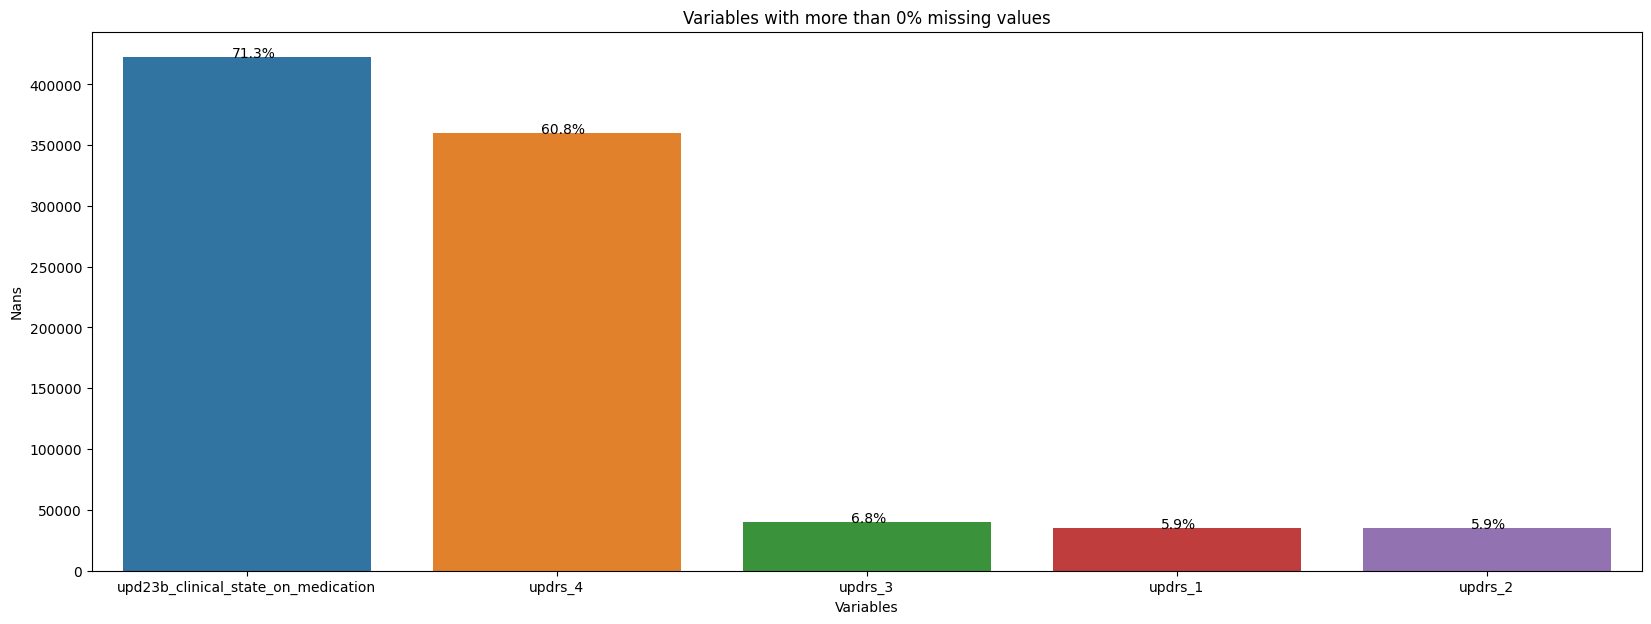

In [8]:
descrip.plot_missing_values(train_r, threshold=0)

In [9]:
# drop the colums with more than 70% null values 
train_r.drop(columns = 'upd23b_clinical_state_on_medication', inplace = True)
# drop null values from outcome 
outcome_miss =  np.where(train_r.updrs_4.isnull() == True)[0].tolist()+ np.where(train_r.updrs_1.isnull() == True)[0].tolist() + np.where(train_r.updrs_2.isnull() == True)[0].tolist() + np.where(train_r.updrs_3.isnull() == True)[0].tolist() 
outcome_miss = np.unique(outcome_miss)
train_full = train_r.drop(index = outcome_miss).reset_index(drop=True)
train_full.visit_id = train_full.visit_id.astype('int')
print(train_r.shape, train_full.shape)

(591931, 11) (229488, 11)


# Modelisation

In [10]:
targets = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'] 
# output and variables separation 
X, y = train_full.drop(columns =targets), train_full[targets]
# separate dtypes 
col_int = X.select_dtypes(exclude = 'object').columns.tolist()
# dummy variables 
X_ = pd.get_dummies(X)
col_all = X_.columns.tolist()
col_cat = list(set(col_all)-set(col_int))
X_[col_cat] = X_[col_cat].astype('category')
X_.head()

,visit_id,visit_month,patient_id,PeptideAbundance,NPX,UniProt_O00391,UniProt_O00533,UniProt_O00584,UniProt_O14498,UniProt_O14773,...,Peptide_YSLTYIYTGLSK,Peptide_YTTEIIK,Peptide_YVGGQEHFAHLLILR,Peptide_YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,Peptide_YVMLPVADQDQC(UniMod_4)IR,Peptide_YVNKEIQNAVNGVK,Peptide_YWGVASFLQK,Peptide_YYC(UniMod_4)FQGNQFLR,Peptide_YYTYLIMNK,Peptide_YYWGGQYTWDMAK
0,15170,0,1517,11648.9,11648.9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15170,0,1517,63593.4,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15170,0,1517,99566.6,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15170,0,1517,16351.0,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15170,0,1517,15566.0,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y

,updrs_1,updrs_2,updrs_3,updrs_4
0,11.0,6.0,25.0,5.0
1,11.0,6.0,25.0,5.0
2,11.0,6.0,25.0,5.0
3,11.0,6.0,25.0,5.0
4,11.0,6.0,25.0,5.0
...,...,...,...,...
229483,8.0,2.0,7.0,2.0
229484,8.0,2.0,7.0,2.0
229485,8.0,2.0,7.0,2.0
229486,8.0,2.0,7.0,2.0


In [12]:
# metrics 
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap) 


def mean_smape(y_true, y_pred):
    res = 0
    for i in range(y_true.shape[1]):
        res = res + smape(y_true.iloc[:,i], y_pred.iloc[:,1])
    return (res / 4) 


In [13]:
mean_smape(y , y+250)

186.78221582268765

In [14]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# split train test 
Xtrain, Xtest, ytrain, ytest = train_test_split( X_, y, test_size=0.30, random_state=132)

In [15]:
# Cross validation 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

# estimateur 
rf = RandomForestRegressor(random_state=15)
params = {
    'n_estimators' : [100,200],
    'max_depth' : [10,15,20]
}

gcv = GridSearchCV(  estimator= rf,
    param_grid= params,
    scoring= make_scorer(mean_smape),
    cv = 2,
    verbose= 4, 
    n_jobs= 10
).fit(Xtrain, ytrain)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


## Descriptive analysis

### About missing values outcome 4

In [15]:
list(np.linspace(0,1,10) )

[0.0,
 0.1111111111111111,
 0.2222222222222222,
 0.3333333333333333,
 0.4444444444444444,
 0.5555555555555556,
 0.6666666666666666,
 0.7777777777777777,
 0.8888888888888888,
 1.0]

In [10]:
#data description 
train_r.iloc[np.where(train_r.updrs_4.isnull() == True)[0].tolist()].describe()

,visit_month,patient_id,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4
count,359694.000000,359694.000000,3.596940e+05,3.596940e+05,325042.000000,325042.000000,322322.000000,0.0
mean,7.511168,31561.995274,6.454497e+05,1.720021e+07,5.101504,4.288507,13.305105,NaN
std,7.974098,18505.304561,3.408000e+06,6.411455e+07,4.622981,5.253837,12.921612,NaN
min,0.000000,55.000000,1.099850e+01,1.541790e+02,0.000000,0.000000,0.000000,NaN
25%,0.000000,16347.000000,2.802405e+04,2.445940e+05,2.000000,0.000000,1.000000,NaN
50%,6.000000,27468.000000,7.394980e+04,9.958990e+05,4.000000,2.000000,12.000000,NaN
75%,12.000000,49239.000000,2.197488e+05,3.725720e+06,7.000000,7.000000,22.000000,NaN
max,24.000000,65043.000000,1.787520e+08,6.138510e+08,33.000000,28.000000,68.000000,NaN
